In [2]:
#Load Dataset
!pip install tensorflow
!pip install pydot
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.preprocessing.image import img_to_array, load_img

In [3]:
import numpy as np
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train
y = y_train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
#Normalize the Data
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(10000,)

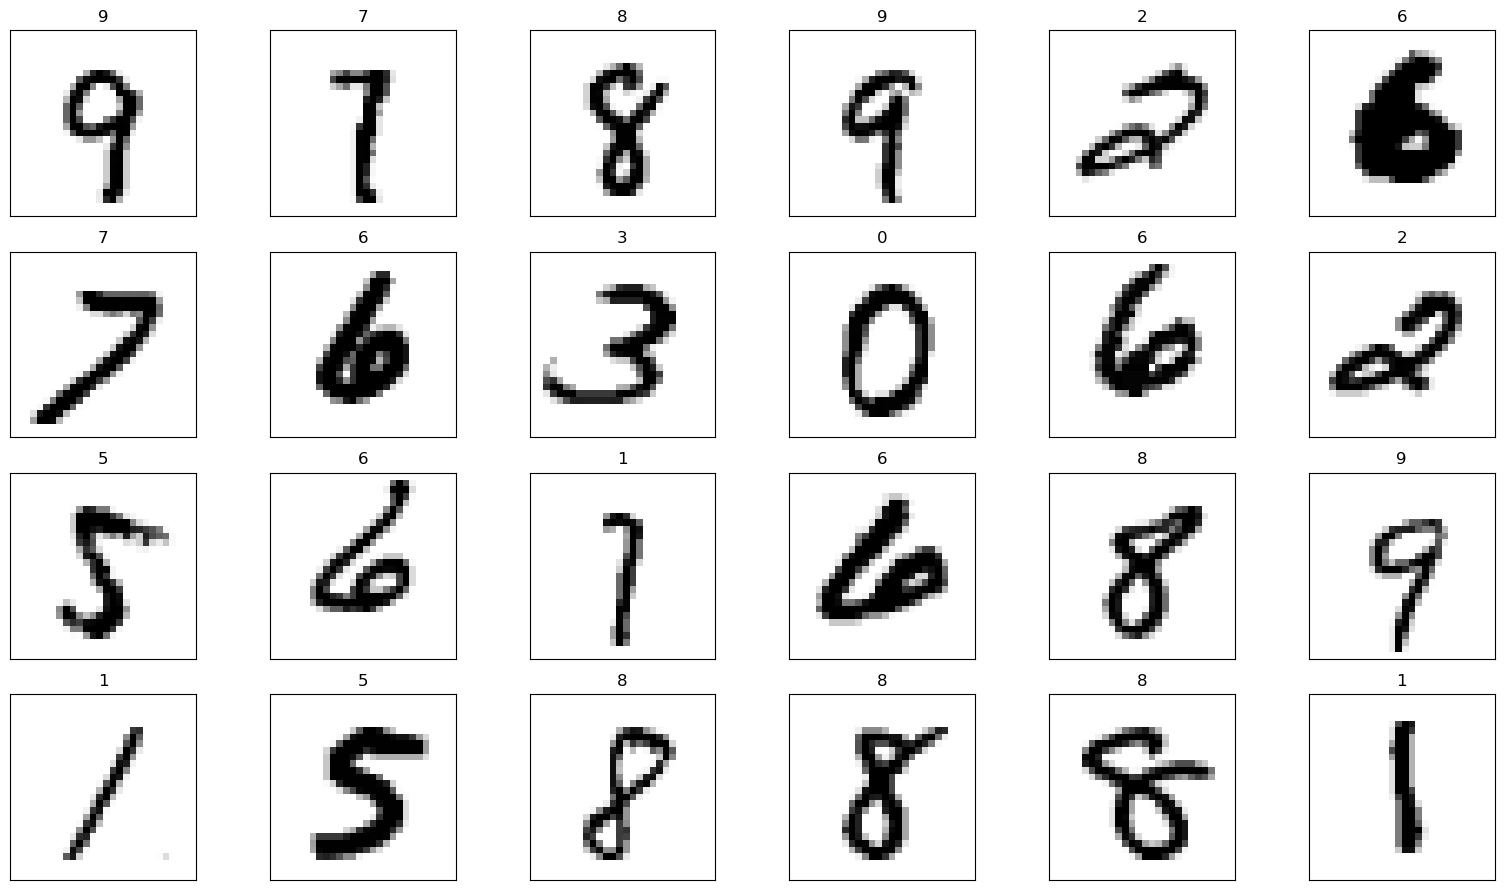

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)  # 24 indices
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)

plt.tight_layout()

In [6]:
print("Number of elements in X_train:", X_train.size)
print("Number of elements in X_test:", X_test.size)


Number of elements in X_train: 37632000
Number of elements in X_test: 7840000


In [54]:
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)  # -1 automatically calculates the number of features
print(X_test.shape)  # Should print (num_test_samples, 64, 64, 3)

(10000, 28, 28)


In [56]:
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)  # New shape: (10000, 28, 28, 1)

# Check the new shape
print(X_test_reshaped.shape)  # Should print (10000, 28, 28, 1)

(10000, 28, 28, 1)


In [58]:
# Flatten X_test for dense layers
X_test_flattened = X_test.reshape(X_test.shape[0], -1)  

# Check the new shape
print(X_test_flattened.shape) 

(10000, 784)


In [60]:
#Normalizing the Data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [62]:
#One-Hot Encoding: Convert Labels to Categorical Data
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape
y_train[0]
y_test = to_categorical(y_test)
y_test.shape


(10000, 10, 2)

In [90]:
y_processed = np.argmax(y, axis=0)  # This gets the class with the highest score, resulting in shape (10000, 10)

# Convert to one-hot encoding if necessary
y_one_hot = np.eye(10)[y_processed]
# Check the shape
print(y_processed.shape)

()


In [92]:
print(y_val.shape)

(12000,)


In [94]:
#Creating Neural Network
import tensorflow as tf
from tensorflow.keras.models import Sequential 
cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [96]:
#Print Summary
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

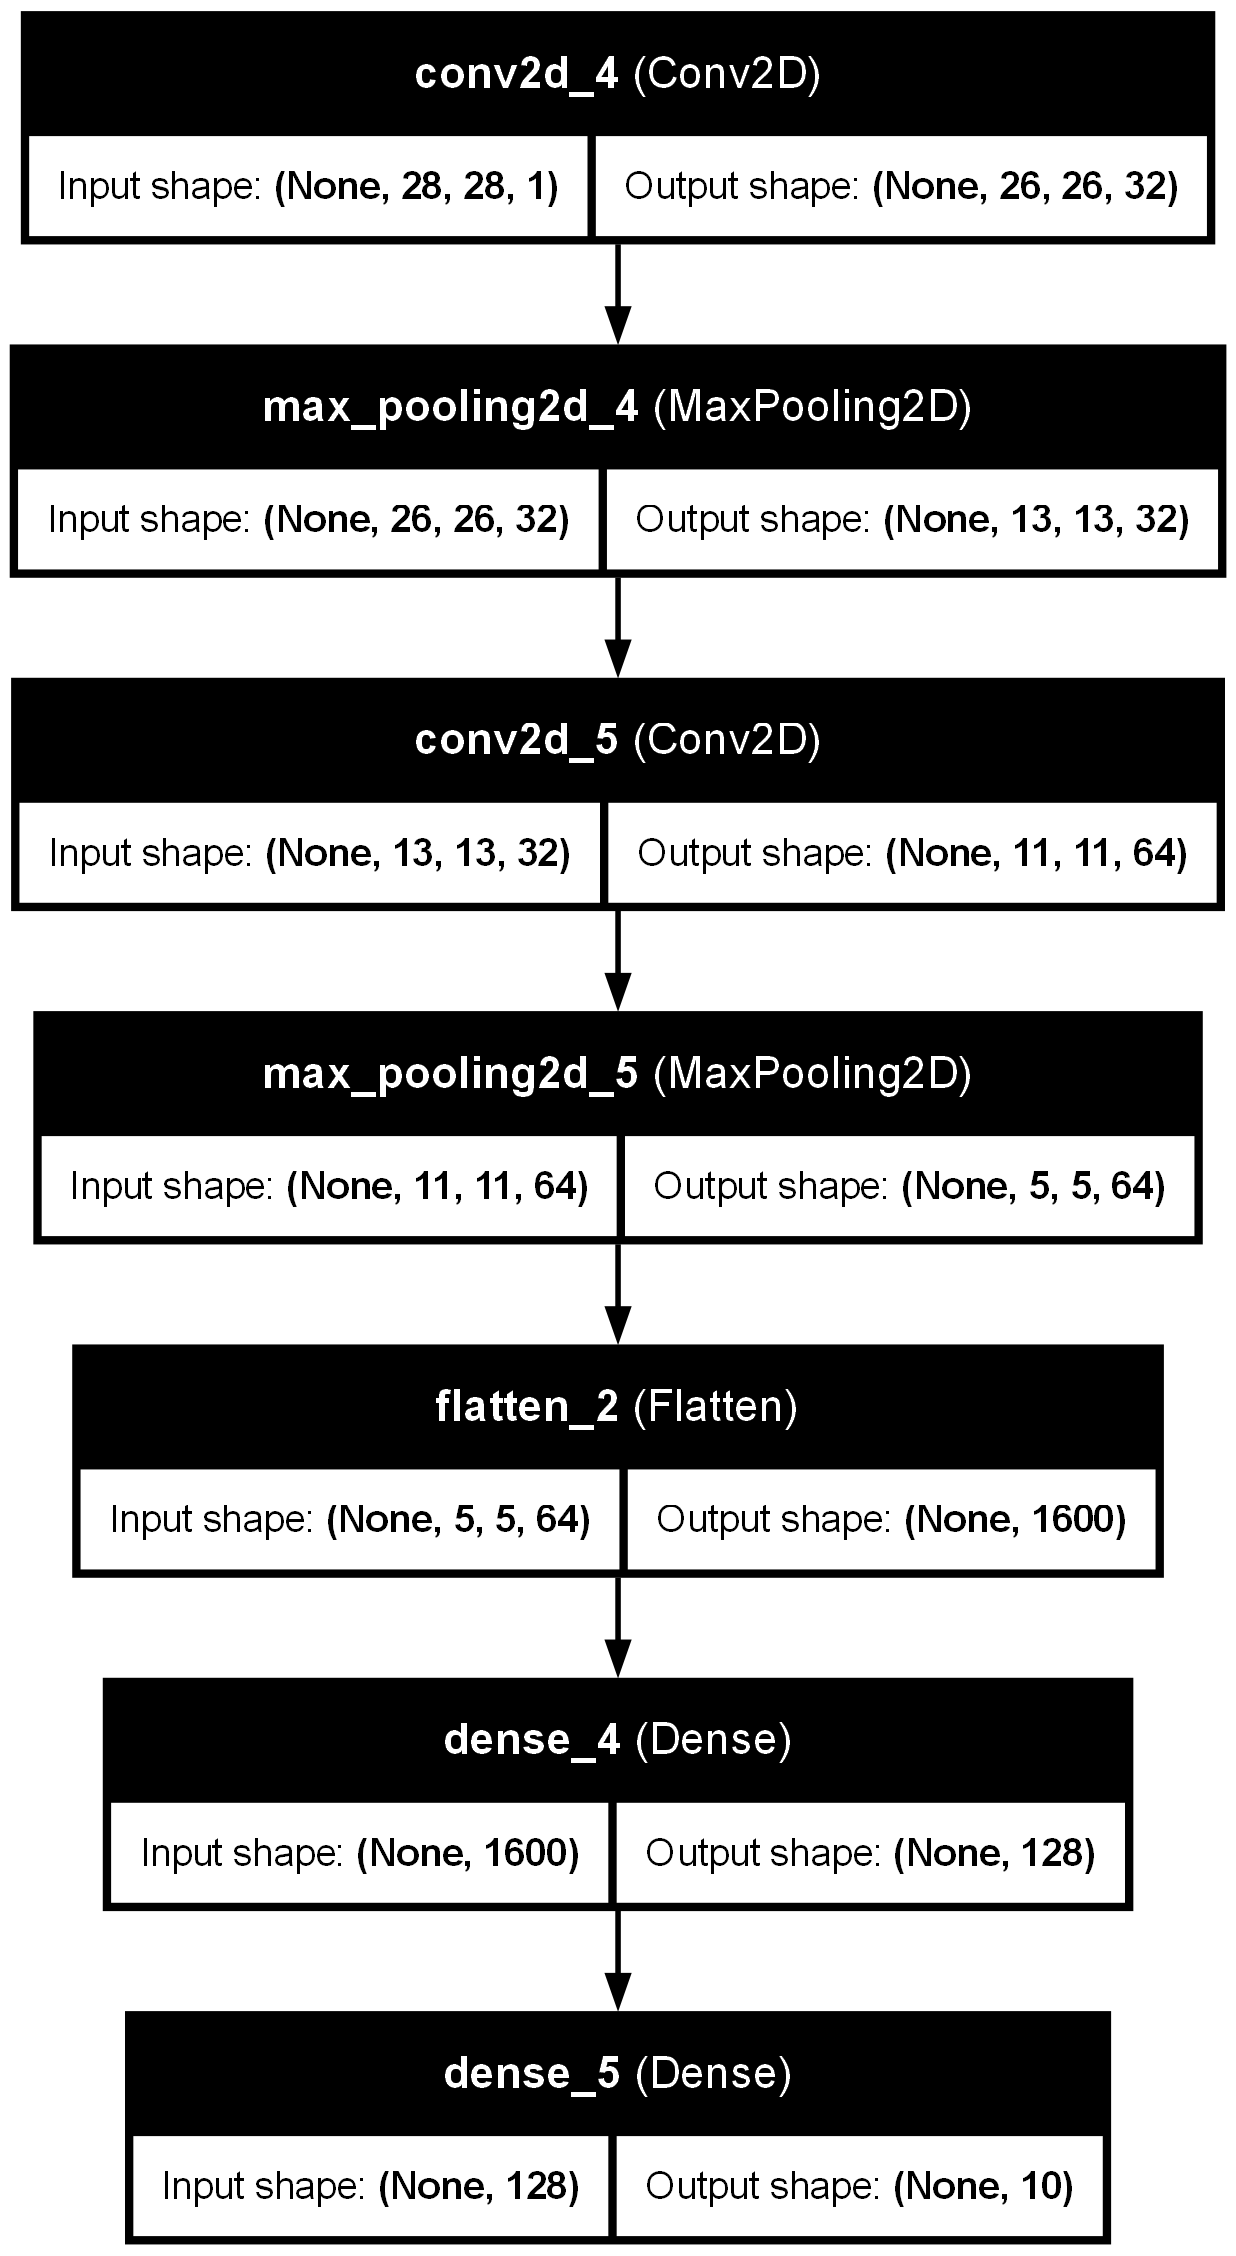

In [98]:
# Visualize
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import os
!pip install graphviz
from graphviz import Digraph

# Ensure the output directory exists
output_dir = 'Users/mikek/Users/'  # Update this to a valid path
if not os.path.exists(output_dir):
    os.makedirs(output_dir)  # Create the directory if it doesn't exist

# Save the model plot to the specified directory
plot_model(cnn, to_file=os.path.join(output_dir, 'test2.png'), show_shapes=True, show_layer_names=True)

# Display the saved image
Image(filename=os.path.join(output_dir, 'test2.png'))

In [99]:
y_train.shape

(48000, 10, 2)

In [100]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])
history = cnn.fit(X_train, y_train_one_hot, epochs=10, batch_size=32, validation_data=(X_val, y_val))
cnn.evaluate(X_test_flattened, y_test)


Epoch 1/10


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(32, 10, 10), output.shape=(32, 10)